# __Multiple Linear Regression Assignment__

## Bike Sharing Demand Prediction

In this notebook, we'll build a linear regression model to predict `Demand for Shared Bikes.` using an appropriate predictor variable.

The solution is divided into the following sections:
- Data Understanding
- Data Cleaning and Manipulation
- Data Visualization
- Data Preparation
- Model Building
- Model Evaluation
- Interpretations & Conclusions

### 1. Data Understanding

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
#Importing libraries
import sys                                                                      
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

# ML Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt
import calendar

# Supress Warnings
import warnings
%matplotlib inline                                                             
warnings.filterwarnings('ignore')

In [2]:
sklearn.__version__

'0.24.2'

In [3]:
sm.__version__

'0.12.2'

In [4]:
# Reading the dataset
bike_data = pd.read_csv("https://raw.githubusercontent.com/nazneenansari/dataset/master/day.csv" , parse_dates=['dteday'])
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [7]:
bike_data.shape

(730, 16)

In [8]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### 2. Data Cleaning and Manipulation

__a. Drop rows with duplicate instant__

In [9]:
duplicate_rows=bike_data[bike_data.duplicated(['instant'])]
duplicate_rows

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [10]:
bike_data.drop_duplicates(subset=None, inplace=True)

__No duplicate__ records with same instant

__b. Drop columns irrelevant for the analysis__

In [11]:
bike_data.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True) 
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


__c. Rename columns__

In [12]:
bike_data.rename(columns={'yr': 'year', 'mnth': 'month','holiday': 'is_holiday', 'weekday': 'week_day', 'workingday': 'is_working_day',
                   'weathersit':'weather_sit','temp': 'temperature','atemp':'a_temperature','hum':'humidity',
                   'windspeed':'wind_speed','cnt':'count'}, inplace=True)

In [13]:
bike_data.columns

Index(['season', 'year', 'month', 'is_holiday', 'week_day', 'is_working_day',
       'weather_sit', 'temperature', 'a_temperature', 'humidity', 'wind_speed',
       'count'],
      dtype='object')

In [14]:
bike_data.head()

,season,year,month,is_holiday,week_day,is_working_day,weather_sit,temperature,a_temperature,humidity,wind_speed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


- __Categorical Variables__
    1. season
    2. year
    3. month
    4. is_holiday
    5. week_day
    6. is_working_day
    7. weather_sit
    
- __Continuous Variables__
    1. a_temperature
    2. humidity
    3. wind_speed 
    4. temperature

### 3. Data Visualization

__a. Correlation between continuous numerical variables__

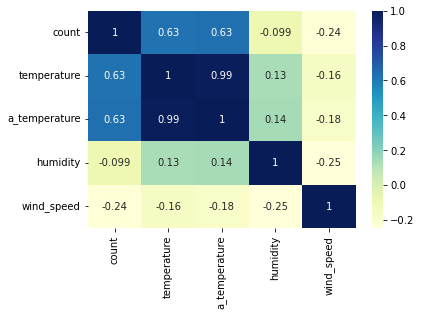

In [15]:
sns.heatmap(bike_data[['count', 'temperature', 'a_temperature', 'humidity','wind_speed']].corr(),annot=True, cmap='YlGnBu' )
plt.show()

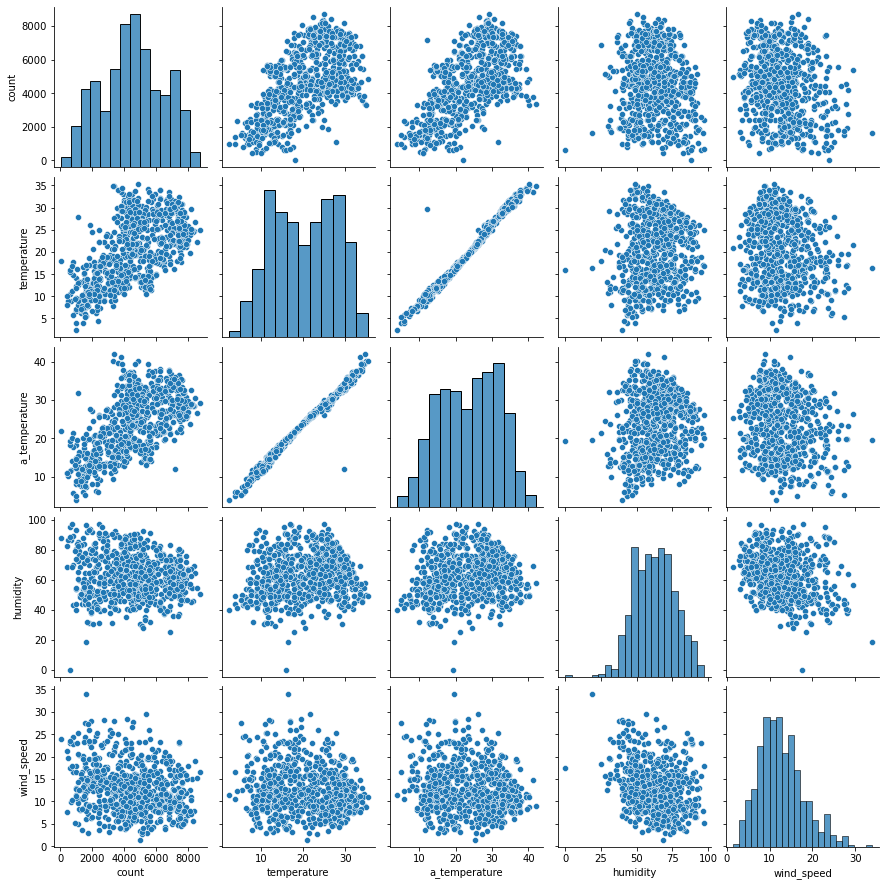

In [16]:
sns.pairplot(data=bike_data,vars=['count', 'temperature', 'a_temperature', 'humidity','wind_speed'])
plt.show()

From the above two graphs, it is evident that __temperature__ and __a_temperature__ are highly correlated.Thus, dropping variable __temperature__. Also, these variables are somewhat linearly corelated with target variable.

In [17]:
bike_data.drop(['temperature'],axis = 1,inplace = True) 
bike_data.head()

,season,year,month,is_holiday,week_day,is_working_day,weather_sit,a_temperature,humidity,wind_speed,count
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


__b. Impact of categorical variables on target variable.__

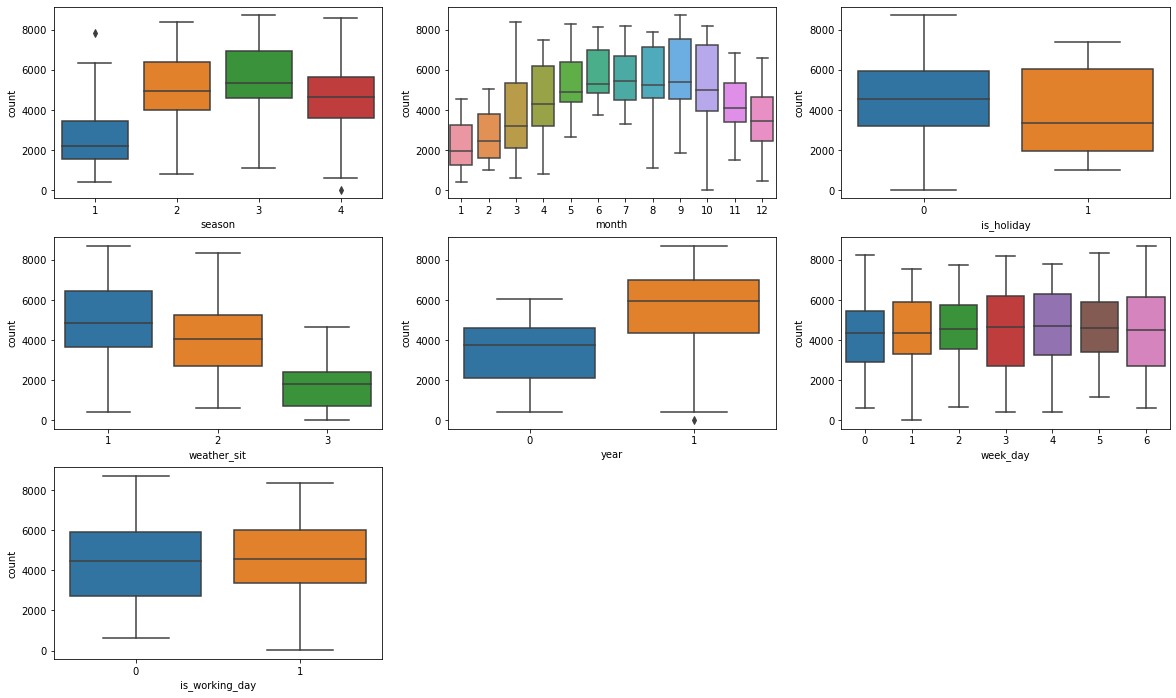

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = bike_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'month', y = 'count', data = bike_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'is_holiday', y = 'count', data = bike_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'weather_sit', y = 'count', data = bike_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'year', y = 'count', data = bike_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'week_day', y = 'count', data = bike_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'is_working_day', y = 'count', data = bike_data)
plt.show()

__Observations:__
- The number of bikers is the __highest__ in __Fall season, followed by Summer__. __Spring season__ has the __lowest__ number of bikers.
- The demand for bikes is __higher in July and September__ comparitively. The demand increased constantly from January to September and dropped after October.
- The usage of bikes on __weekday is higher than on holida__y. Also, the bike usage throughout the week days are almost the same.
- The demand of bikes has increased in 2019 as compared to 2018.
- People prefer to ride bikes on a __clear or partly cloudy day__. There is __no demand__ of bikes on during __heavy rain or thunderstorm.__


### 4. Data Preparation

__a. Convert numeric columns to categorical variables as per data dictionary__

In [19]:
# Map Months 
bike_data['month'] = bike_data['month'].apply(lambda x: calendar.month_abbr[x])
bike_data.month.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [20]:
# Map Seasons
bike_data['season'] = bike_data['season'].map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})
bike_data.season.unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [21]:
# Map Weather Sit
bike_data['weather_sit'] = bike_data['weather_sit'].map({1:'Clear', 2:'Mist_Cloudy', 3:'Light_Snow', 4:'Heavy_Rain'})
bike_data.weather_sit.unique()

array(['Mist_Cloudy', 'Clear', 'Light_Snow'], dtype=object)

In [22]:
# Map Weekday
bike_data['week_day'] = bike_data['week_day'].map({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday",
                                                   4:"Thursday", 5:"Friday", 6:"Saturday"})
bike_data.week_day.unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [23]:
bike_data.head()

,season,year,month,is_holiday,week_day,is_working_day,weather_sit,a_temperature,humidity,wind_speed,count
0,Spring,0,Jan,0,Saturday,0,Mist_Cloudy,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist_Cloudy,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600


__b. Create dummy for all categorical variables.__

In [24]:
bike_data = pd.get_dummies(bike_data, drop_first=True)
bike_data.head()

,year,is_holiday,is_working_day,a_temperature,humidity,wind_speed,count,season_Spring,season_Summer,season_Winter,...,month_Oct,month_Sep,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday,weather_sit_Light_Snow,weather_sit_Mist_Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
bike_data.columns

Index(['year', 'is_holiday', 'is_working_day', 'a_temperature', 'humidity',
       'wind_speed', 'count', 'season_Spring', 'season_Summer',
       'season_Winter', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan',
       'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov',
       'month_Oct', 'month_Sep', 'week_day_Monday', 'week_day_Saturday',
       'week_day_Sunday', 'week_day_Thursday', 'week_day_Tuesday',
       'week_day_Wednesday', 'weather_sit_Light_Snow',
       'weather_sit_Mist_Cloudy'],
      dtype='object')

__c. Split Data into training and test set__

In [26]:
#Train Test split with 70:30 ratio
np.random.seed(0)
bike_data_train, bike_data_test = train_test_split(bike_data, train_size=0.7, test_size=0.3, random_state=100)

In [27]:
#Inspect independent variables
bike_data_train.head()

,year,is_holiday,is_working_day,a_temperature,humidity,wind_speed,count,season_Spring,season_Summer,season_Winter,...,month_Oct,month_Sep,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday,weather_sit_Light_Snow,weather_sit_Mist_Cloudy
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [28]:
# Check shape and size for train and test fro independent variables
print(bike_data_train.shape)
print(bike_data_test.shape)

(510, 29)
(219, 29)


__d. Feature Scaling__

In [29]:
num_vars = ['a_temperature','humidity','wind_speed', 'count']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
bike_data_train[num_vars] = scaler.fit_transform(bike_data_train[num_vars])

In [30]:
bike_data_train.head()

,year,is_holiday,is_working_day,a_temperature,humidity,wind_speed,count,season_Spring,season_Summer,season_Winter,...,month_Oct,month_Sep,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday,weather_sit_Light_Snow,weather_sit_Mist_Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [31]:
#Inspect status of Training set after scaling
bike_data_train.describe()

,year,is_holiday,is_working_day,a_temperature,humidity,wind_speed,count,season_Spring,season_Summer,season_Winter,...,month_Oct,month_Sep,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday,weather_sit_Light_Snow,weather_sit_Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5. Model Building

__a. Divide train set into X and y for model building__

In [32]:
# y to contain only target variable
y_train = bike_data_train.pop('count')

#X is all remainign variable also our independent variables
X_train = bike_data_train

__b. Feature Selection using RFE__

In [33]:
lm = LinearRegression()
lm.fit(X_train, y_train)
# Select top 15  features
rfe = RFE(lm, 15)           
rfe = rfe.fit(X_train, y_train)

In [34]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('is_holiday', True, 1),
 ('is_working_day', False, 2),
 ('a_temperature', True, 1),
 ('humidity', True, 1),
 ('wind_speed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 5),
 ('season_Winter', True, 1),
 ('month_Aug', False, 6),
 ('month_Dec', True, 1),
 ('month_Feb', False, 3),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 7),
 ('month_Mar', False, 14),
 ('month_May', False, 4),
 ('month_Nov', True, 1),
 ('month_Oct', False, 12),
 ('month_Sep', True, 1),
 ('week_day_Monday', False, 9),
 ('week_day_Saturday', True, 1),
 ('week_day_Sunday', False, 8),
 ('week_day_Thursday', False, 11),
 ('week_day_Tuesday', False, 10),
 ('week_day_Wednesday', False, 13),
 ('weather_sit_Light_Snow', True, 1),
 ('weather_sit_Mist_Cloudy', True, 1)]

In [35]:
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['year', 'is_holiday', 'a_temperature', 'humidity', 'wind_speed',
       'season_Spring', 'season_Winter', 'month_Dec', 'month_Jan', 'month_Jul',
       'month_Nov', 'month_Sep', 'week_day_Saturday', 'weather_sit_Light_Snow',
       'weather_sit_Mist_Cloudy'],
      dtype='object')

In [36]:
X_train.shape

(510, 28)

In [37]:
#Function to build a linear model using statsmodel api
def build_model(selectedCols):
    X_train_sm = sm.add_constant(X_train[selectedCols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    #print(lm.params)
    print(lm.summary())
    return lm

In [38]:
#Function to calculate VIFs and print them
def get_vif(selectedCols):
    X = X_train[selectedCols]
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### Model 1

In [39]:
# selecting all the columns supported by RFE
cols = ['year', 'is_holiday', 'a_temperature', 'humidity', 'wind_speed',
       'season_Spring', 'season_Winter', 'month_Dec', 'month_Jan', 'month_Jul',
       'month_Nov', 'month_Sep', 'week_day_Saturday', 'weather_sit_Light_Snow',
       'weather_sit_Mist_Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          9.67e-187
Time:                        12:32:21   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

All the variables have p-value less than 0.05. However, __humidity has a high VIF of 25.08__. Hence, dropping humidity from the list of selected columns. R-square and Adjusted R-square are __0.842__ and __0.837__ respectively.

### Model 2

In [40]:
#Removing humidity variable
cols = ['year', 'is_holiday', 'a_temperature', 'wind_speed',
       'season_Spring', 'season_Winter', 'month_Dec', 'month_Jan', 'month_Jul',
       'month_Nov', 'month_Sep', 'week_day_Saturday', 'weather_sit_Light_Snow',
       'weather_sit_Mist_Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.7
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          1.10e-184
Time:                        12:32:21   Log-Likelihood:                 501.21
No. Observations:                 510   AIC:                            -972.4
Df Residuals:                     495   BIC:                            -908.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

__week_day_Saturday__ has p-value more than 0.05. Hence, removing week_day_Saturday from the selected columns.

### Model 3

In [41]:
#Removing weather_sit_Light_Snow variable
cols = ['year', 'is_holiday', 'a_temperature', 'wind_speed',
       'season_Spring', 'season_Winter', 'month_Dec', 'month_Jan', 'month_Jul',
       'month_Nov', 'month_Sep', 'weather_sit_Light_Snow',
       'weather_sit_Mist_Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          3.95e-185
Time:                        12:32:21   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Removing __weather_sit_Light_Snow__ variable as it negatively corelated.

### Model 4

In [42]:
cols = ['year', 'is_holiday', 'a_temperature', 'wind_speed',
       'season_Spring', 'season_Winter', 'month_Dec', 'month_Jan', 'month_Jul',
       'month_Nov', 'month_Sep', 'weather_sit_Mist_Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.4
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          4.36e-160
Time:                        12:32:21   Log-Likelihood:                 437.30
No. Observations:                 510   AIC:                            -848.6
Df Residuals:                     497   BIC:                            -793.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Removing __weather_sit_Light_Snow__ variable dropped the value of R-square and Adjusted R-square. Removing __month_Nov__ variable as it has p-value of __0.112__.

### Model 5

In [43]:
cols =  ['year', 'is_holiday', 'a_temperature', 'wind_speed',
       'season_Spring', 'season_Winter', 'month_Dec', 'month_Jan', 'month_Jul',
        'month_Sep', 'weather_sit_Mist_Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          1.15e-160
Time:                        12:32:22   Log-Likelihood:                 436.00
No. Observations:                 510   AIC:                            -848.0
Df Residuals:                     498   BIC:                            -797.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Removing __month_Dec__ variable as it has p-value of __0.171.__

### Model 6

In [44]:
cols =  ['year', 'is_holiday', 'a_temperature', 'wind_speed',
       'season_Spring', 'season_Winter', 'month_Jan', 'month_Jul',
        'month_Sep', 'weather_sit_Mist_Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     186.4
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          2.08e-161
Time:                        12:32:22   Log-Likelihood:                 435.04
No. Observations:                 510   AIC:                            -848.1
Df Residuals:                     499   BIC:                            -801.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Removing __season_Winter__ as it has __high p-value__ comparitively.           

### Model 7

In [45]:
cols = ['year', 'is_holiday', 'a_temperature', 'wind_speed',
       'season_Spring', 'month_Jan', 'month_Jul',
        'month_Sep', 'weather_sit_Mist_Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     205.9
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          6.57e-162
Time:                        12:32:22   Log-Likelihood:                 433.46
No. Observations:                 510   AIC:                            -846.9
Df Residuals:                     500   BIC:                            -804.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

R-square and Adjusted R-square did not drop much. Lets try to remove __wind_speed__ as it is negatively corelated.

### Model 8

In [46]:
cols = ['year', 'is_holiday', 'a_temperature', 
       'season_Spring', 'month_Jan', 'month_Jul',
        'month_Sep', 'weather_sit_Mist_Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     212.6
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          1.13e-155
Time:                        12:32:22   Log-Likelihood:                 415.98
No. Observations:                 510   AIC:                            -814.0
Df Residuals:                     501   BIC:                            -775.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

The p-value of __month_Jan__ variable increased significantly.Hence, removing __month_Jan__

### Model 9

In [47]:
cols =  ['year', 'is_holiday', 'a_temperature', 'season_Spring', 'month_Jul',
        'month_Sep', 'weather_sit_Mist_Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     242.4
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          1.57e-156
Time:                        12:32:22   Log-Likelihood:                 415.16
No. Observations:                 510   AIC:                            -814.3
Df Residuals:                     502   BIC:                            -780.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Adding __weather_sit_Light_Snow__ as dropping it, dropped the value of R-square and Adjuested R-Square in Model 3. Removing __is_holiday__ variable as it is negatively corelated.

### Model 10

In [48]:
cols =  ['year',  'a_temperature', 'season_Spring','season_Winter', 'month_Jul','month_Sep', 'weather_sit_Light_Snow','weather_sit_Mist_Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     280.3
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          1.52e-179
Time:                        12:32:22   Log-Likelihood:                 472.11
No. Observations:                 510   AIC:                            -926.2
Df Residuals:                     501   BIC:                            -888.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Adding __weather_sit_Light_Snow__, improved R-score without impacting other variable. The p-value and VIF of all the variables is less than 0.05 and 5 respectively. Therefore, we will select this model for Model Evaluation.

In [49]:
final_cols = cols

### 6. Model Evaluation

__a. Residual Analysis__

In [50]:
# Error terms
def plot_err_terms(residual,length,figLabel):
    c = [i for i in range(1,length+1,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c , residual, color="orange", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms of ' + figLabel, fontsize=20)
    plt.xlabel('Index', fontsize = 15)                      
    plt.ylabel('Errors', fontsize = 15) 

In [51]:
X_train = X_train[final_cols]

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [52]:
y_train_pred = lm.predict(X_train)

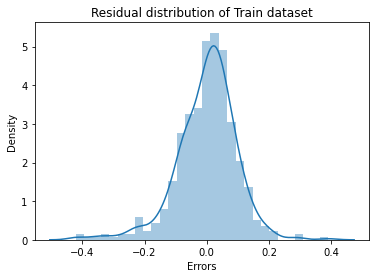

In [53]:
residual = y_train - y_train_pred
sns.distplot(residual)
plt.title('Residual distribution of Train dataset')
plt.xlabel('Errors')
plt.show()

The above distplot depicts that the __residual of train dataset__ is a __normal distribution.__

In [54]:
#R-squared Value of train data set
r2_score(y_train,y_train_pred)

0.8173851208184806

The R-square value of the __predicted__ is same as R-square obtained from Model 10, which is the selected model.

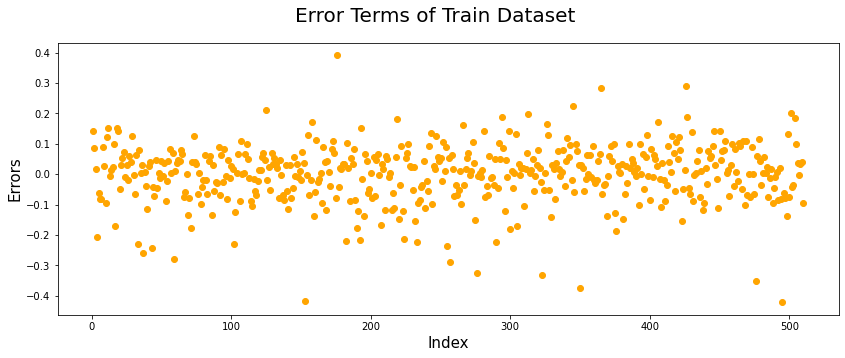

In [55]:
#Plot error terms for train data set
plot_err_terms(y_train - y_train_pred, len(y_train), 'Train Dataset')

From the above scatter plot, it can be concluded that there are __no visible patterns in the error terms__, except few ouliers.

__b. Predictions on test set__

In [56]:
num_vars = ['a_temperature','humidity','wind_speed', 'count']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
bike_data_test[num_vars] = scaler.fit_transform(bike_data_test[num_vars])

In [57]:
# y to contain only target variable
y_test = bike_data_test.pop('count')

#X is all remainign variable also our independent variables
X_test = bike_data_test

In [58]:
#Predict the values for test data
y_test_pred = lm.predict(X_test[cols])

In [59]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8067857501097131

R-square of the test dataset __0.811__ which is almost the same as the R-sqaure of the train dataset __0.817__. This is a good R-squared value, hence the model is performing good even on test data.

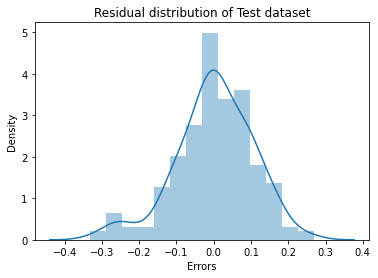

In [60]:
residual = y_test - y_test_pred
sns.distplot(residual)
plt.title('Residual distribution of Test dataset')
plt.xlabel('Errors')
plt.show()

The above distplot depicts that the __residual of test dataset__ is nearly a __normal distribution__, which the mean centered at 0.

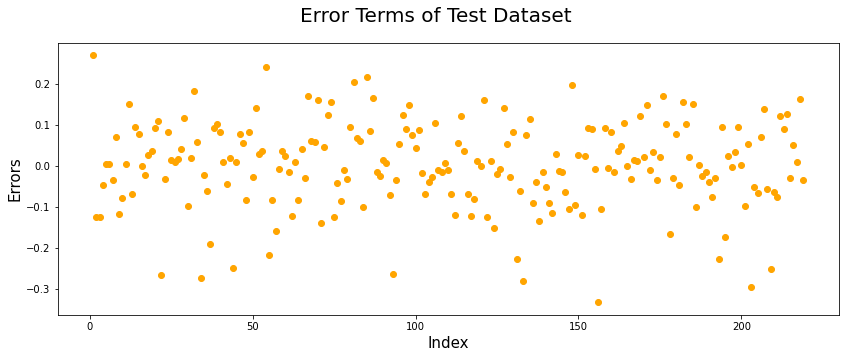

In [61]:
#Plot error terms for test data
plot_err_terms(y_test - y_test_pred, len(y_test), 'Test Dataset')

From the above scatter plot, it is visible that there are __no visible patterns in the error terms__, except few ouliers.

__c. Plot Actual v/s Predicted values__

In [62]:
def plot_act_pred(actual,predicted,scale,dataname):
    c = [i for i in range(1,scale + 1 ,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c, actual, color="green", linewidth=2.5, linestyle="-", label='Actual')
    plt.plot(c, predicted, color="red",  linewidth=2.5, linestyle="-.", label='Predicted')
    fig.suptitle('Actual and Predicted - '+ dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)
    plt.legend()

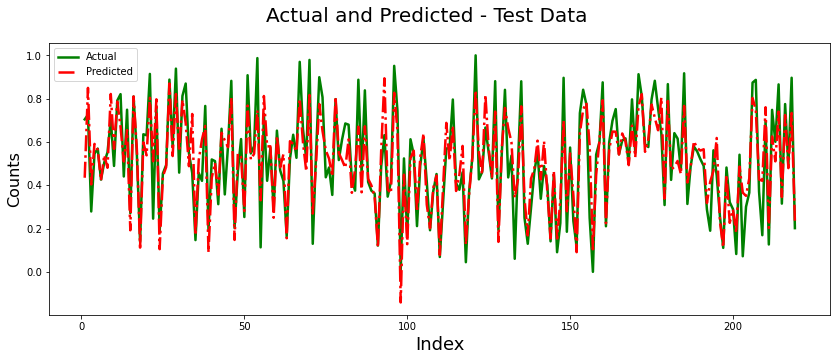

In [63]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test, y_test_pred, len(y_test),'Test Data')

The actual and the predicted data follows the same pattern, i.e. the predictions are close to actuals

### 7. Interpretations

After model evaluation, it is observed that Model 10 is a good fit for predicting bike sharing demand.

In [64]:
lm = build_model(final_cols)
get_vif(final_cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     280.3
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          1.52e-179
Time:                        12:32:26   Log-Likelihood:                 472.11
No. Observations:                 510   AIC:                            -926.2
Df Residuals:                     501   BIC:                            -888.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [65]:
lm.params

const                      0.195405
year                       0.234376
a_temperature              0.491107
season_Spring             -0.117719
season_Winter              0.044980
month_Jul                 -0.064787
month_Sep                  0.063155
weather_sit_Light_Snow    -0.289808
weather_sit_Mist_Cloudy   -0.078457
dtype: float64

- The equation for the best fitted line is given by:

__count__ =  0.195 + 0.234× __year__ + 0.491× __a_temperature__ + (-0.117) × __season_Spring__ + 0.044× __season_Winter__ + (-0.064)× __month_Jul__ + 0.063× __month_Sep__  + (-0.289)× __weather_sit_Light_Snow__ + (-0.078)× __weather_sit_Mist_Cloudy__.

After analysis, the bike sharing company should focus on the following:
- The number of bike users has increased in 2019 as compared to 2018, so it can be anticipated that the business will grow over the years without any changes in the current settings.
- The company should focus to tackle the decrease in their revenue during Spring season and in the month of July as the business in negatively impacted during these periods. This can be done by rolling out offers and discounts during Spring season.
- The bookings are less during Light Snow and Rainy days. The company should focus on servicing their bikes during this time.
- The business is doing well in the month of September and during Winter season. The company should expand the business and increase their revenue exponentially through marketing and advertising.